# Section 2.1.1: Polynomial curve fitting
## by Telmo Cunha

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(55)

In [2]:
sample_size=20

# uniform distribution over [0,1]
x=np.random.uniform(low=0.0, high=1.0, size=sample_size)

In [3]:
# sin function in [0,2pi]
def hidden_function(x):
    return np.sin(2*np.pi*x)

In [4]:
# random noise generation N(0,0.3)
z=np.random.normal(loc=0.0, scale=0.3, size=sample_size)

In [5]:
t=hidden_function(x)+z

In [6]:
deg=3

# computes w by minimizing least squares
w=np.polyfit(x, t, deg, rcond=None, full=False, w=None, cov=False)
print(w)

# construct the polynomial function
x2 = np.linspace(0, 1, 200)
y_star=np.polyval(w,x2)

[ 20.40734754 -31.77158213  11.38545113  -0.11774394]


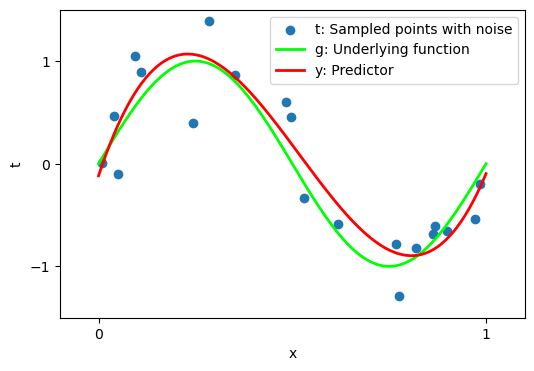

In [7]:
# plot
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x, t,label="t: Sampled points with noise")

ax.set(xlim=(-0.1, 1.1), xticks=np.arange(0, 1.1),
       ylim=(-1.5, 1.5), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x')  # Add an x-label to the axes.
ax.set_ylabel('t')  # Add a y-label to the axes.

x2 = np.linspace(0, 1, 200)
y2 = hidden_function(x2)

ax.plot(x2, y2, linewidth=2.0, color="lime",label="g: Underlying function")
ax.plot(x2, y_star, linewidth=2.0, color="red",label="y: Predictor")

ax.legend();  # Add a legend.
plt.show()

# Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

In [9]:
# Construct a matrix A of samplesize x degree to input in the model

A=np.zeros((sample_size,deg+1))

for i in range(sample_size):
    newrow = []
    for j in range(0,deg+1):
        newrow.append(pow(x[i],j))
    A[i]=newrow

In [10]:
# train the model

model = Ridge(alpha=0.01)
model.fit(A, t)

Ridge(alpha=0.01)

In [11]:
# compute the prediction pairs samplesize x degree in matrix B

num_predictions=200
x2 = np.linspace(0, 1, num_predictions)
B=np.zeros((num_predictions,deg+1))

for i in range(num_predictions):
    newrow = []
    for j in range(0,deg+1):
        newrow.append(pow(x2[i],j))
    B[i]=newrow

y_star_ridge=model.predict(B)

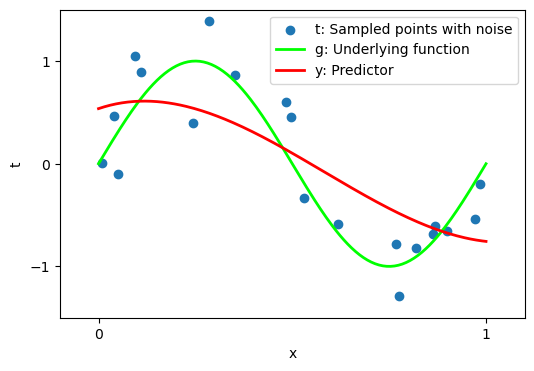

In [12]:
# plot for ridge regression
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x, t,label="t: Sampled points with noise")

ax.set(xlim=(-0.1, 1.1), xticks=np.arange(0, 1.1),
       ylim=(-1.5, 1.5), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x')  # Add an x-label to the axes.
ax.set_ylabel('t')  # Add a y-label to the axes.

y2 = hidden_function(x2)

ax.plot(x2, y2, linewidth=2.0, color="lime",label="g: Underlying function")
ax.plot(x2, y_star_ridge, linewidth=2.0, color="red",label="y: Predictor")

ax.legend();  # Add a legend.
plt.show()

# Introducing Uncertainty

In [13]:
#computing beta_inverse and standard deviation

aux0=np.polyval(w,x)-t
aux1=np.square(aux0)
aux2=np.sum(aux1)
beta_inverse=1.0/sample_size*aux2
std=np.sqrt(beta_inverse)

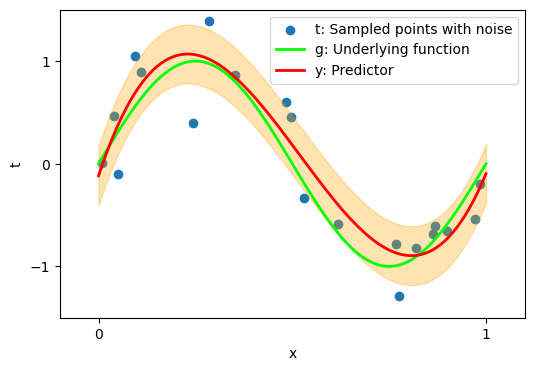

In [14]:
# plot
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x, t,label="t: Sampled points with noise")

ax.set(xlim=(-0.1, 1.1), xticks=np.arange(0, 1.1),
       ylim=(-1.5, 1.5), yticks=np.arange(-1, 1.1,1))

ax.set_xlabel('x')  # Add an x-label to the axes.
ax.set_ylabel('t')  # Add a y-label to the axes.

x2 = np.linspace(0, 1, 200)
y2 = hidden_function(x2)

ax.plot(x2, y2, linewidth=2.0, color="lime",label="g: Underlying function")
ax.plot(x2, y_star, linewidth=2.0, color="red",label="y: Predictor")

ax.legend();  # Add a legend.

# adds a transparent fill between +-std of the predictor
plt.fill_between(x2, y_star-std, y_star+std, color="orange",alpha=0.3)
plt.show()